# IMPORT

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Reading CSV & Data exploration

In [17]:
df = pd.read_csv("csv_files\\regularite-mensuelle-tgv-aqst.csv",sep=";")

In [18]:
print("--------------Data Head--------------")
#print(df.head())
print("\n")
print("--------------Data Description--------------")
print(df.describe())
print("\n")
print("--------------Data Types--------------")
print(df.dtypes)
print("\n")


--------------Data Head--------------


--------------Data Description--------------
       duree_moyenne  nb_train_prevu  nb_annulation  commentaire_annulation  \
count    8154.000000     8154.000000    8154.000000                     0.0   
mean      169.860314      257.198308      11.349644                     NaN   
std        87.390774      173.815703      26.544553                     NaN   
min         0.000000        0.000000       0.000000                     NaN   
25%       100.000000      142.000000       0.000000                     NaN   
50%       164.000000      221.000000       3.000000                     NaN   
75%       221.000000      333.000000      10.000000                     NaN   
max       786.000000     1075.000000     297.000000                     NaN   

       nb_train_depart_retard  retard_moyen_depart  \
count             8154.000000          8154.000000   
mean                88.434265            11.205745   
std                 90.384803            

In [19]:
print("--------------Identification missing values --------------")
print(df.isnull().sum())

--------------Identification missing values --------------
date                                       0
service                                    0
gare_depart                                0
gare_arrivee                               0
duree_moyenne                              0
nb_train_prevu                             0
nb_annulation                              0
commentaire_annulation                  8154
nb_train_depart_retard                     0
retard_moyen_depart                        0
retard_moyen_tous_trains_depart            0
commentaire_retards_depart              8154
nb_train_retard_arrivee                    0
retard_moyen_arrivee                       0
retard_moyen_tous_trains_arrivee           0
commentaires_retard_arrivee             7456
nb_train_retard_sup_15                     0
retard_moyen_trains_retard_sup15           0
nb_train_retard_sup_30                     0
nb_train_retard_sup_60                     0
prct_cause_externe                       

### Dropna or fillna ? / handle duplicates if there any ? 

In [20]:
#df = df.dropna()  
# OR
#df = df.fillna("value")  
#& OR 
#df = df.drop_duplicates()

In [21]:
df['date'] = pd.to_datetime(df['date'])

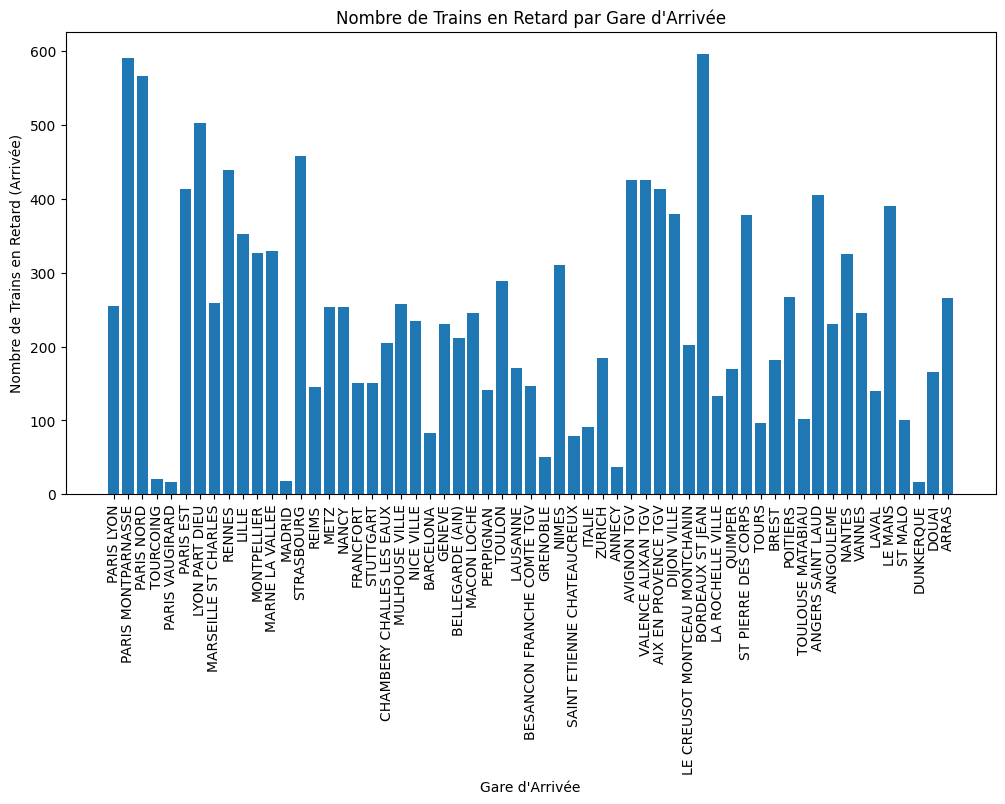

In [22]:


xpoints = df['gare_depart']
ypoints = df['nb_train_depart_retard']

plt.figure(figsize=(12, 6))  # Facultatif : définir la taille du graphique
plt.bar(xpoints, ypoints)  # Utiliser bar pour un graphique en barres
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Nombre de Trains en Retard (Arrivée)')
plt.title('Nombre de Trains en Retard par Gare d\'Arrivée')
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x (facultatif si les noms sont longs)

plt.show()






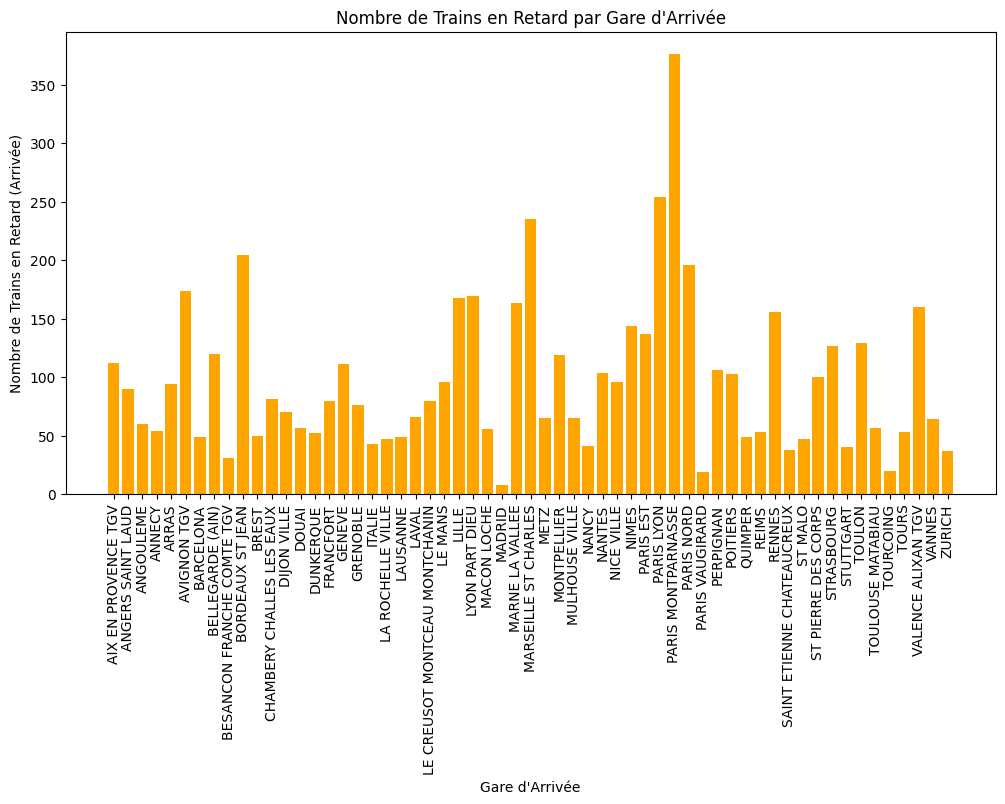

In [23]:
xpoints = df['gare_arrivee']
ypoints = df['nb_train_retard_arrivee']

plt.figure(figsize=(12, 6))  # Facultatif : définir la taille du graphique
plt.bar(xpoints, ypoints, color='orange')  # Utiliser bar pour un graphique en barres
plt.xlabel('Gare d\'Arrivée')
plt.ylabel('Nombre de Trains en Retard (Arrivée)')
plt.title('Nombre de Trains en Retard par Gare d\'Arrivée')
plt.xticks(rotation=90)  # Pour faire pivoter les étiquettes de l'axe x (facultatif si les noms sont longs)

plt.show()


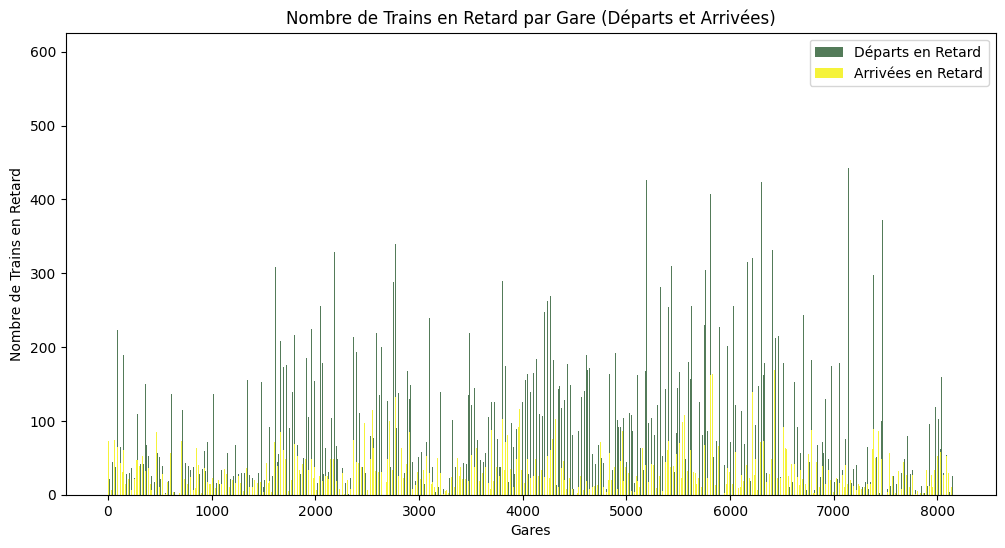

In [35]:
gares = df['gare_depart'] 

x = range(len(gares))
width = 0.4  # Largeur des barres

plt.figure(figsize=(12, 6))
bars1 = plt.bar(x, df['nb_train_depart_retard'], width=width, label='Départs en Retard',color='#537B59')
bars2 = plt.bar(x, df['nb_train_retard_arrivee'], width=width, label='Arrivées en Retard', align='edge',color='#F5F33A')

plt.xlabel('Gares')
plt.ylabel('Nombre de Trains en Retard')
plt.title('Nombre de Trains en Retard par Gare (Départs et Arrivées)')

plt.legend()

plt.show()

Nous remarquons que pour nos trajets, nous avons une majorité de retards au départ et moins pour retard à l'arrivé. 
Nous pouvons alors supposer que les trains dans la majorité réussissent à rattraper leur retard durant leur trajet. 

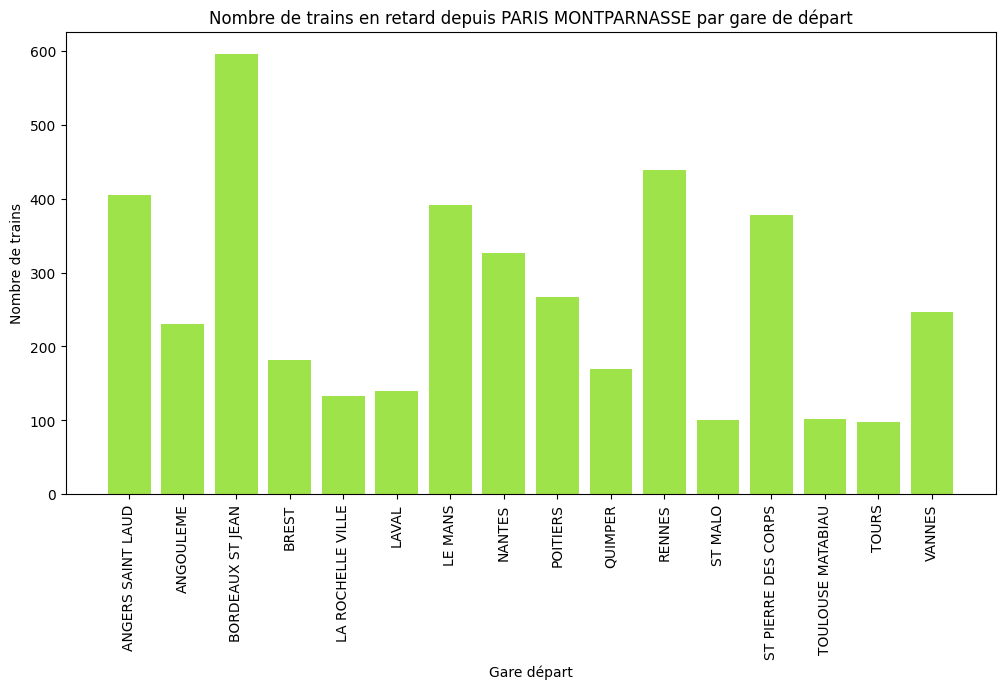

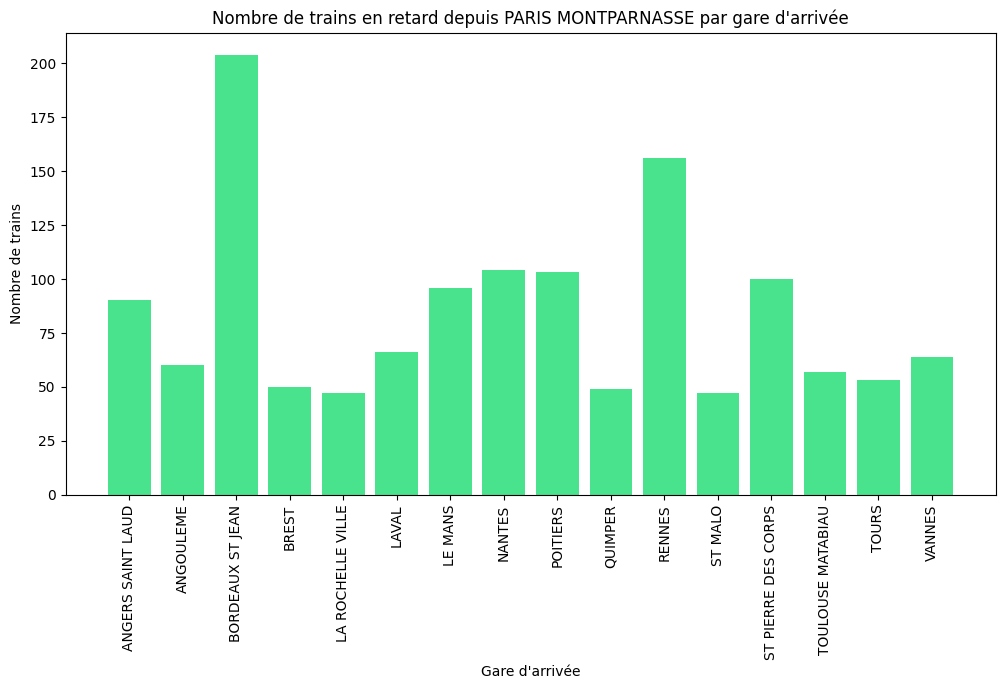

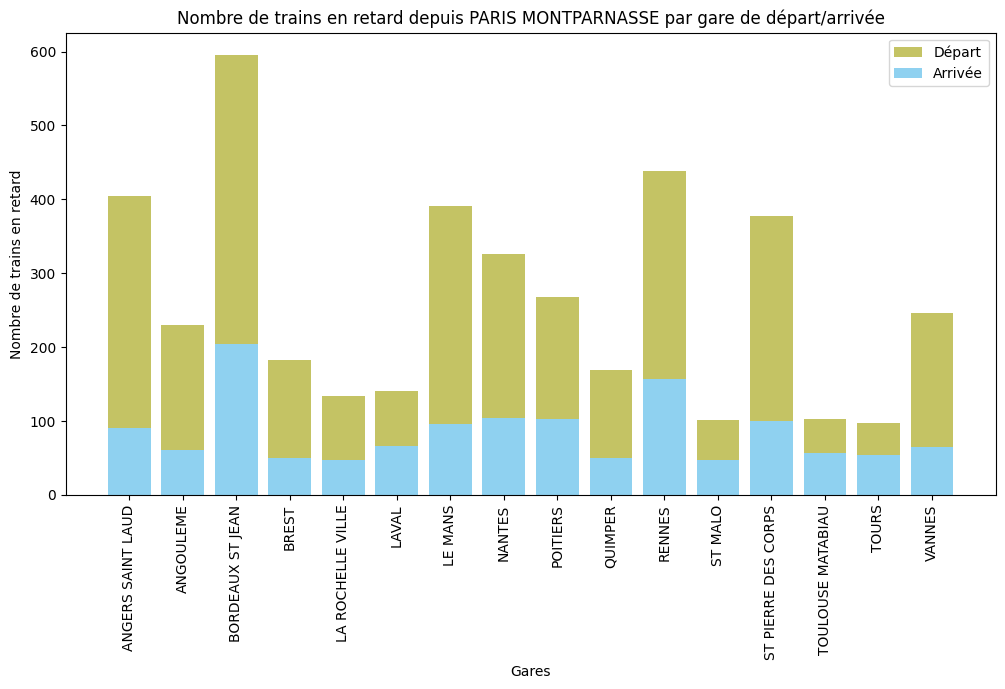

In [38]:
paris_montparnasse_data_depart = df[df['gare_arrivee'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_depart = paris_montparnasse_data_depart.sort_values(by='gare_depart')

# Créez un graphique en fonction de la gare d'arrivée et de nb_annulation
plt.figure(figsize=(12, 6))
plt.bar(paris_montparnasse_data_depart['gare_depart'], paris_montparnasse_data_depart['nb_train_depart_retard'], color='#9FE34A')
plt.xlabel('Gare départ')
plt.ylabel('Nombre de trains')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare de départ')
plt.show()

###########################################################################################################

paris_montparnasse_data_arrivee = df[df['gare_depart'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_arrivee = paris_montparnasse_data_arrivee.sort_values(by='gare_arrivee')

# Créez un graphique en fonction de la gare d'arrivée et de nb_annulation
plt.figure(figsize=(12, 6))
plt.bar(paris_montparnasse_data_arrivee['gare_arrivee'], paris_montparnasse_data_arrivee['nb_train_retard_arrivee'],color='#4AE38D')
plt.xlabel('Gare d\'arrivée')
plt.ylabel('Nombre de trains')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare d\'arrivée')
plt.show()


####################################################################################################

# Filtrez les données pour Paris Montparnasse (départ et arrivée)
paris_montparnasse_data_depart = df[df['gare_arrivee'] == 'PARIS MONTPARNASSE']
paris_montparnasse_data_arrivee = df[df['gare_depart'] == 'PARIS MONTPARNASSE']

# Triez les données pour les deux cas
paris_montparnasse_data_depart = paris_montparnasse_data_depart.sort_values(by='gare_depart')
paris_montparnasse_data_arrivee = paris_montparnasse_data_arrivee.sort_values(by='gare_arrivee')

# Créez un graphique
plt.figure(figsize=(12, 6))

# Affichez les données de départ en bleu
plt.bar(paris_montparnasse_data_depart['gare_depart'], paris_montparnasse_data_depart['nb_train_depart_retard'], color='#C4C364', label='Départ')

# Affichez les données d'arrivée en vert
plt.bar(paris_montparnasse_data_arrivee['gare_arrivee'], paris_montparnasse_data_arrivee['nb_train_retard_arrivee'], color='#8FD1F0', label='Arrivée')

plt.xlabel('Gares')
plt.ylabel('Nombre de trains en retard')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.title('Nombre de trains en retard depuis PARIS MONTPARNASSE par gare de départ/arrivée')
plt.legend()  # Ajoutez une légende pour différencier les données de départ et d'arrivée

plt.show()




